<a href="https://colab.research.google.com/github/Rohithb97/DesignOptimization2021Fall/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Local solution exists at [-1.5739877   1.37736099 -0.19662671]


Text(0, 0.5, 'Log error')

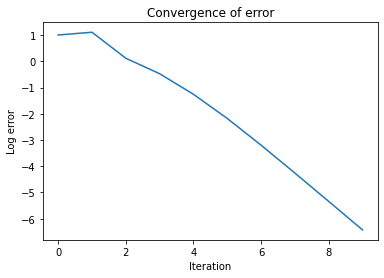

In [6]:
import numpy as np
import math
from matplotlib import pyplot as plt


def objfun(x): #Initial step
    a1=x[0]
    a2=x[1]
    a3=x[2]
    return a1**2+a2**2+a3**2


#Derivatives


def Pfpd(x):
    return 2*x[0] 


def Pfps(x):
    return np.array([2*x[1], 2*x[2]])


def Phps(x):
    return np.array([[2/5*x[1], 2/25*x[2]],[1, -1]])


def Phpd(x):
    return np.array([[x[0]/2],[1]])


def Dfdd(x):  #Reduced gradient
    #a1 = d; a2,a3=s
    return Pfpd(x) - np.matmul( np.matmul(Pfps(x), np.linalg.inv(Phps(x))), Phpd(x) )


def xeval(x,a,dfdd): #linesearch.
    d_eval= (x[0]-a*dfdd)[0]
    s_eval= x[1:3] + a* np.transpose( np.matmul(  np.matmul(np.linalg.inv(Phps(x)) , Phpd(x) ), np.transpose([Dfdd(x)]) ) )[0]
    return np.append(d_eval,s_eval)


def linesearch(dfdd, x):
    b=1
    c=.5
    t=.3
    while objfun(xeval(x,b,dfdd)) > (objfun(x) - b*t* dfdd**2):
        b=c*b
    return b


def solve(x):  #Takes in intermediate x value [dk, sk0], gives final x value [dk, sk]
    while np.linalg.norm(np.array([ [ x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1 ], [x[0]+x[1]-x[2] ] ]))  > e: #While |h| > e
        phps=Phps(x)
        skj1= np.transpose( np.transpose([x[1:3]]) - np.matmul( np.linalg.inv(phps), np.array([ [ x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1 ], [x[0]+x[1]-x[2] ] ])   ))  #Transposing in step 2.
        x=np.append(x[0:1], np.transpose(skj1[0]))
    return x
        
    
        


        
# The Loop


a1=0
a3= 1/12 * ( (600-170*(a1**2))**(1/2) +10*a1)
a2= a3-a1


a0=np.array([a1, a2, a3])  # a2 and a3 are state variables


e=10**(-3)


x_store=[a0]
err=[]




while np.linalg.norm(Dfdd(x_store[-1])) > e:
    x=x_store[-1]
    dfdd=Dfdd(x)
    err.append(math.log(np.linalg.norm(dfdd)))
    b= linesearch(dfdd, x)
    dk= x[0]- b*dfdd
    sk0= x[1:3] + b* np.transpose(  np.matmul(np.matmul(np.linalg.inv(Phps(x)), Phpd(x)),  np.transpose(dfdd)) )
    xk0=np.append(dk,sk0)
    x = solve(xk0)
    x_store.append(x)
    
print('Local solution exists at ' +str(x_store[-1]))
plt.plot(err)
plt.title('Convergence of error')
plt.xlabel('Iteration')
plt.ylabel('Log error')